In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence \
    import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [4]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [5]:
Boston = load_data("Boston")

In [7]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [8]:
Boston?

Type:        DataFrame
String form:
crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
           0    0.00632  18.0   2.3 <...> 0   5.64  23.9
           504     21.0   6.48  22.0
           505     21.0   7.88  11.9
           
           [506 rows x 13 columns]
Length:      506
File:        c:\users\luisn\.conda\envs\islp\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its

In [ ]:
# Simple linear regression on medv vs lstat

In [9]:
X = pd.DataFrame({'intercept': np.ones(Boston.shape[0]),'lstat': Boston['lstat']})
# Intercept is a fake variable = 1 added to get an additional fitting paramter. 
# Seems that without it sm assumes zero intercept by default.

In [11]:
Y = Boston['medv']
model = sm.OLS(Y,X)
results = model.fit()

In [13]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


In [31]:
# Testing what happens in sm without intercept
#XT = pd.DataFrame({'lstat': Boston['lstat']})
#modelT = sm.OLS(Y,XT)
#resultsT = modelT.fit()
#summarize(resultsT)

,coef,std err,t,P>|t|
lstat,1.1221,0.055,20.271,0.0


In [30]:
results.params['intercept']

np.float64(34.55384087938308)

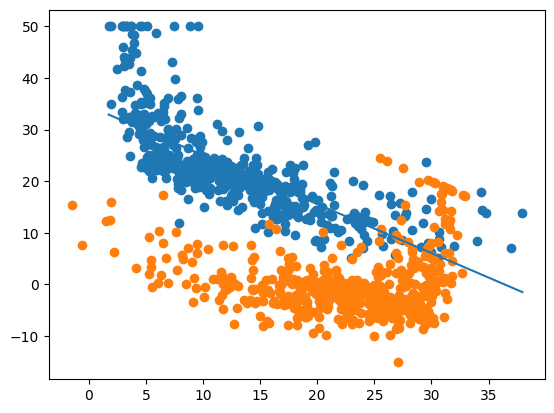

In [59]:
Xline = np.linspace(min(Boston['lstat']),max(Boston['lstat']),50)
Yline  = 34.5538-0.9500*Xline          
YlineT = 1.1221*Xline
plt.figure()
plt.scatter(Boston['lstat'],Boston['medv'])
plt.scatter(results.fittedvalues,results.resid)
plt.plot(Xline,Yline)

#plt.plot(Xline,YlineT)
plt.show()

In [41]:
# MS is an ISLP function that creates a transform object (prob usuing 
# sklearn in the backgorund), which can then be used  worked with using
# trnasform and fit to create the model matrix

design = MS(['lstat']) # Here simply checks that lstat is there and takes it
design = design.fit(Boston)
X = design.transform(Boston) # Here simply takes the data and adds the intercept variable
# X = design.fit_transform(Boston) #does the same thing for this example

In [47]:
# Can use results form model manually such as above, but can also
# use get-prediction. Need to make a new data frame for points you
# want predicitons

new_df = pd.DataFrame({'lstat':[5,10,15]})
newX = design.transform(new_df) # design remembers fit  from before!
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [48]:
new_preds = results.get_prediction(newX)

In [57]:
new_preds.predicted_mean  # Predictions
new_preds.conf_int(alpha=0.05) # Confidence intervals
new_preds.conf_int(obs=True,alpha=0.05) # Prediction intervals takes into account possible
                                        # randomness of observation itself

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

Type:        PredictionResults
String form: <statsmodels.regression._prediction.PredictionResults object at 0x0000021C6D4D57F0>
File:        c:\users\luisn\.conda\envs\islp\lib\site-packages\statsmodels\regression\_prediction.py
Docstring:  
Results class for predictions.

Parameters
----------
predicted_mean : ndarray
    The array containing the prediction means.
var_pred_mean : ndarray
    The array of the variance of the prediction means.
var_resid : ndarray
    The array of residual variances.
df : int
    The degree of freedom used if dist is 't'.
dist : {'norm', 't', object}
    Either a string for the normal or t distribution or another object
    that exposes a `ppf` method.
row_labels : list[str]
    Row labels used in summary frame.

In [60]:
#Multiple linear regression

In [64]:
X = MS(['lstat','age']).fit_transform(Boston)
model1 = sm.OLS(Y,X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [65]:
terms = Boston.columns.drop('medv')
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [66]:
X = MS(terms).fit_transform(Boston)
model1 = sm.OLS(Y,X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [70]:
vals = [VIF(X,i) for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},index=X.columns[1:]) # here ignoring intercept

In [71]:
vif

,vif
crim,1.767486
zn,2.298459
indus,3.987181
chas,1.071168
nox,4.369093
rm,1.912532
age,3.088232
dis,3.954037
rad,7.445301
tax,9.002158


In [74]:
# Interaction terms
X = MS(['lstat' ,'age',('lstat','age')]).fit_transform(Boston)
model2 = sm.OLS(Y,X)
summarize(model2.fit())


,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


In [78]:
# Polynomial
X = MS([poly('lstat',degree=2),'age']).fit_transform(Boston)
model3 = sm.OLS(Y,X)
results3 = model3.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [80]:
anova_lm(results1,results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,493.0,11349.418808,0.0,NaN,NaN,NaN
1,502.0,14165.613251,-9.0,-2816.194443,11.0889,NaN


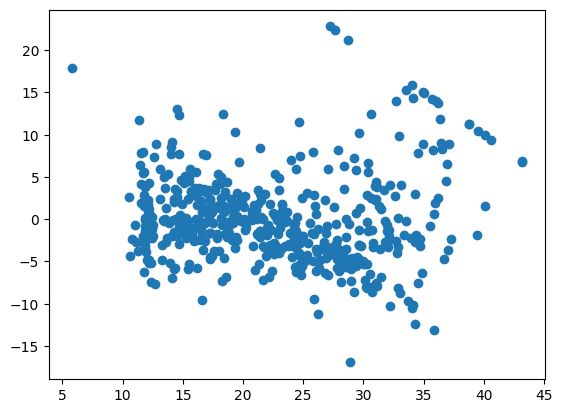

In [82]:
plt.figure()
plt.scatter(results3.fittedvalues,results3.resid)
plt.show()

In [83]:
# Switch to Carseats data set
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [85]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income','Advertising'),('Price','Age')] #Interactions
X = MS(final).fit_transform(Carseats) # Automatically creates dummy variables for Shelveloc
model = sm.OLS(y,X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
